In [1]:
#load required libraries for sentiment analysis
library(twitteR)
library(RCurl)
library(httr)
library(tm)
library(wordcloud)
library(syuzhet)
library(SnowballC)

Loading required package: bitops
Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:httr':

    content

Loading required package: RColorBrewer


In [3]:
infy = read.csv("C:/Users/Sudhahar/Desktop/TwitterDataInfy.csv")

In [5]:
head(infy[,-c(1,2)])

username,to,text,date,retweets,favorites,mentions,hashtags,geo
AliceWi33,,"RBS deal loss: Infosys says wonâ€™t cut 3,000 jobs, but will reallocate them in other projects: RBS announced l... http://bc.vc/apT5Wt8",17-08-2016,0,0,,,NA
TandMProdCo,,"Big News Network - Infosys to sack 3,000 techies as Scottish bank cancels deal http://bit.ly/2bBUS4u",17-08-2016,0,0,,,NA
Audrey4f,,"RBS deal loss: Infosys says wonâ€™t cut 3,000 jobs, but will reallocate them in other projects: RBS announced l... http://bc.vc/apT5Wt8",17-08-2016,0,0,,,NA
rampalsingh,,"3,000 jobs to get affected post RBS project scrap: #Infosys - http://ecoti.in/0t6l1Y",17-08-2016,0,0,,#Infosys,NA
Cognicenti,,If it is not a fact nothing is true in this world INDIAN JINGOISM HAS NO MATCH,17-08-2016,0,0,,,NA
khanadid,,"BT_India: Sensex, Nifty close lower, Infosys erases losses http://www.businesstoday.in/markets/stocks/sensex-nifty-trading-asian-markets-us-markets-august-16-2016/story/236125.html â€¦pic.twitter.com/m2lBgL15Cm",17-08-2016,0,0,,,NA


In [6]:
infy = infy[,c("text","date")]

In [10]:
head(infy,10)

text,date
"RBS deal loss: Infosys says wonâ€™t cut 3,000 jobs, but will reallocate them in other projects: RBS announced l... http://bc.vc/apT5Wt8",17-08-2016
"Big News Network - Infosys to sack 3,000 techies as Scottish bank cancels deal http://bit.ly/2bBUS4u",17-08-2016
"RBS deal loss: Infosys says wonâ€™t cut 3,000 jobs, but will reallocate them in other projects: RBS announced l... http://bc.vc/apT5Wt8",17-08-2016
"3,000 jobs to get affected post RBS project scrap: #Infosys - http://ecoti.in/0t6l1Y",17-08-2016
If it is not a fact nothing is true in this world INDIAN JINGOISM HAS NO MATCH,17-08-2016
"BT_India: Sensex, Nifty close lower, Infosys erases losses http://www.businesstoday.in/markets/stocks/sensex-nifty-trading-asian-markets-us-markets-august-16-2016/story/236125.html â€¦pic.twitter.com/m2lBgL15Cm",17-08-2016
"#Infosys to sack 3,000 techies as #Scottish bank cancels deal #RBS #ArunJaitley http://www.freepressjournal.in/india/infosys-to-sack-3000-techies-as-scottish-bank-cancels-deal/911392 â€¦pic.twitter.com/1wEPhZNfEF",17-08-2016
"@Infosys loses RBS deal, a sale on the horizon I see. May be.",17-08-2016
"ETTN Infosys says employees impacted by RBS deal loss will be reallocated, not fired: MUMBAI: Infosys said th... http://bit.ly/2bmKc5d",17-08-2016
"ETTN Mapping the market: Crude shock for Infosys, Unitech; broader market still firm: NEW DELHI: Ouch! That h... http://bit.ly/2aX1AN6",17-08-2016


In [11]:
#text cleaning
infy$text=gsub("&amp", "", infy$text)
infy$text = gsub("&amp", "", infy$text)
infy$text = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", "", infy$text)
infy$text = gsub("@\\w+", "", infy$text)
infy$text = gsub("[[:punct:]]", "", infy$text)
infy$text = gsub("[[:digit:]]", "", infy$text)
infy$text = gsub("http\\w+", "", infy$text)
infy$text = gsub("[ \t]{2,}", "", infy$text)
infy$text = gsub("^\\s+|\\s+$", "", infy$text)

infy$text <- iconv(infy$text, "UTF-8", "ASCII", sub="")

In [14]:
head(infy)

text,date
RBS deal loss Infosys says wont cutjobs but will reallocate them in other projects RBS announced l,17-08-2016
Big News NetworkInfosys to sacktechies as Scottish bank cancels deal,17-08-2016
RBS deal loss Infosys says wont cutjobs but will reallocate them in other projects RBS announced l,17-08-2016
jobs to get affected post RBS project scrap Infosys,17-08-2016
If it is not a fact nothing is true in this world INDIAN JINGOISM HAS NO MATCH,17-08-2016
BTIndia Sensex Nifty close lower Infosys erases lossespictwittercommlBgLCm,17-08-2016


In [12]:
#calculate sentiment value for each twit
sent.value = get_sentiment(infy$text,method = "nrc")

In [16]:
category_senti = ifelse(sent.value < 0, "Negative", ifelse(sent.value > 0, "Positive", "Neutral"))

In [17]:
infy$Polarity = category_senti

In [18]:
table(infy$Polarity )


Negative  Neutral Positive 
   87381   370511   312674 

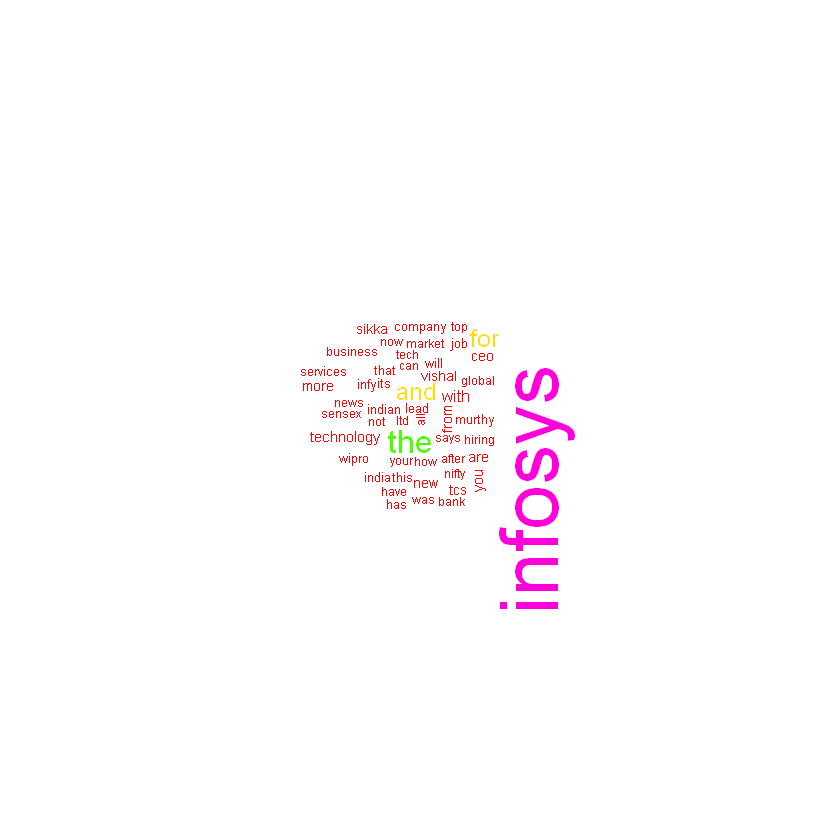

In [21]:
corpusABG = Corpus(VectorSource(infy$text))
wordcloud(corpusABG,colors=rainbow(7),max.words=50)

In [22]:
#build corpus bag of words
corpusABG = tm_map(corpusABG, tolower)
corpusABG = tm_map(corpusABG, removePunctuation)
corpusABG = tm_map(corpusABG, removeWords, c(stopwords("english")))
corpusABG = tm_map(corpusABG, stemDocument)

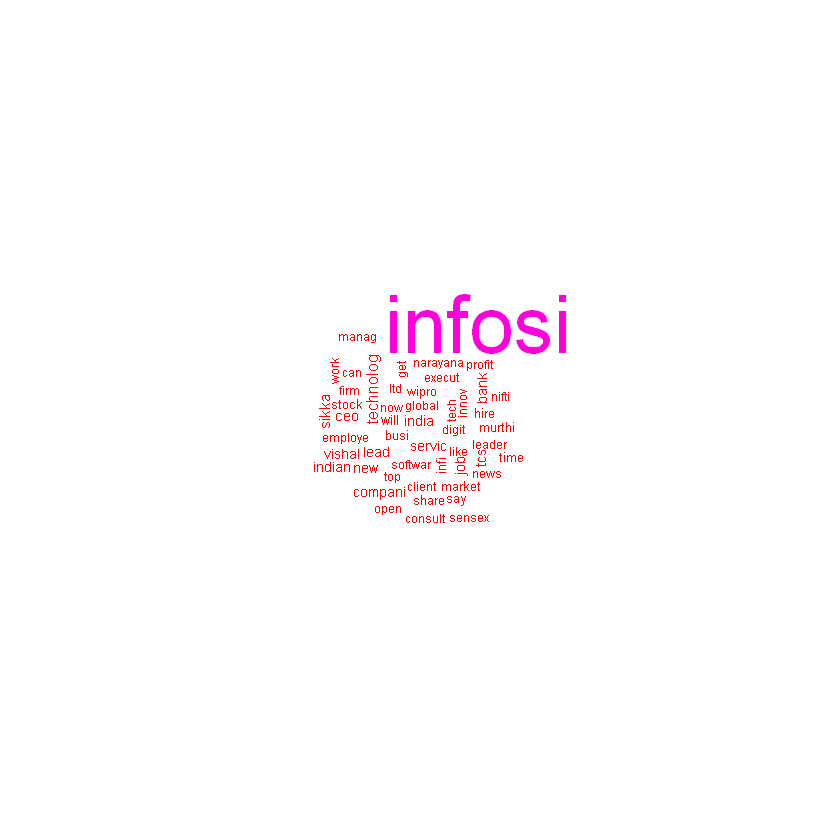

In [28]:
wordcloud(corpusABG,colors=rainbow(7),max.words=50)

In [26]:
class(corpusABG)

[1] "SimpleCorpus" "Corpus"